In [35]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [36]:
df = pd.read_csv("/Users/kostya/Downloads/result.csv")

In [37]:

df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df.head()


,Authors,Title,Source title,Year,Affiliations,Authors with affiliations,Author Keywords
0,Lei R.; Chen L.;,Adaptive neural network fault-tolerant control...,Zhendong yu Chongji/Journal of Vibration and S...,2020,School of Mechanical Engineering and Automatio...,"Lei R., School of Mechanical Engineering and A...",Fault-tolerant control; Flexible arm; Singular...
1,Zhang Y.; Hu C.; Lyu B.; Li H.; Ying Z.; Wang ...,Tunable Cherenkov Radiation of Phonon Polarito...,Nano Letters,2020,Key Laboratory of Artificial Structures and Qu...,"Zhang Y., Key Laboratory of Artificial Structu...",2D materials; Cherenkov radiation; infrared na...
2,Ma Z.; Xiang X.; Ren Y.;,Quantitative decision-making model for buildin...,Qinghua Daxue Xuebao/Journal of Tsinghua Unive...,2020,"Department of Civil Engineering, Tsinghua Univ...","Ma Z., Department of Civil Engineering, Tsingh...",Building facility maintenance; Decision-making...
3,Gao Y.-F.; He L.; Jiang Z.; Sun J.-P.; Ma Q.-L.;,Unidirectional helical edge states for all-die...,Photonic Network Communications,2020,"School of Mechanical Engineering, Jiangsu Univ...","Gao Y.-F., School of Mechanical Engineering, J...",Nontrivial; Pseudo-time-reversal symmetry; Qua...
4,Shen C.;,The asymptotic limits of Riemann solutions for...,Mathematical Methods in the Applied Sciences,2020,"School of Mathematics and Statistics Science, ...","Shen C., School of Mathematics and Statistics ...",delta shock wave; drift-flux model; Riemann pr...


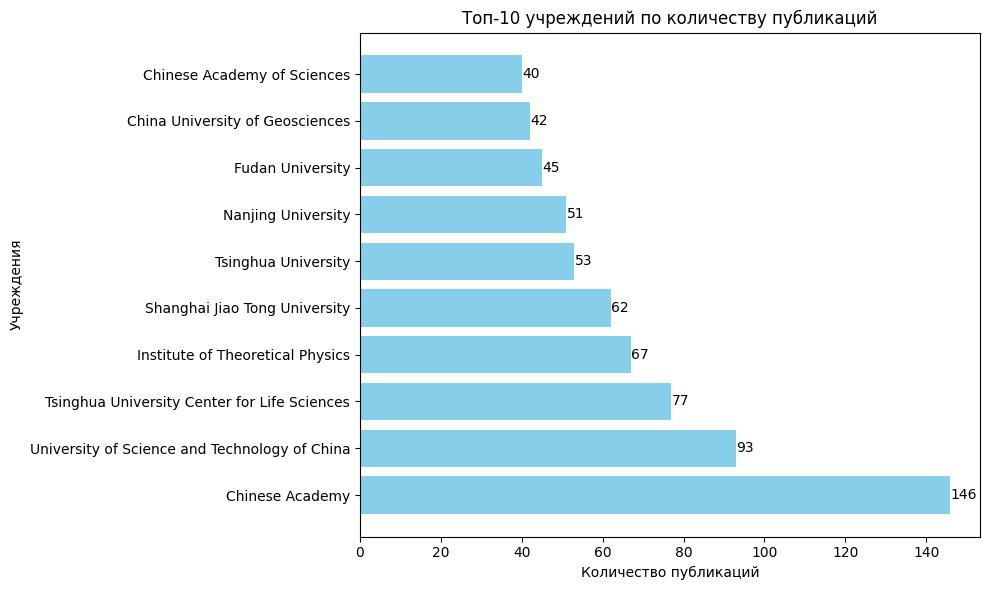

In [93]:
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Словарь для сопоставления индексов и названий
index_to_name = {
    "100049": "Chinese Academy",
    "230026": "University of Science and Technology of China",
    "100871": "Tsinghua University Center for Life Sciences",
    "100190": "Institute of Theoretical Physics",
    "200240": "Shanghai Jiao Tong University",
    "100084": "Tsinghua University",
    "210093": "Nanjing University",
    "200032": "Fudan University",
    "430074": "China University of Geosciences",
    "94720": "Chinese Academy of Sciences"
}

# Создаем пустой Counter для хранения частоты индексов
index_counter = Counter()

# Проходим по каждой строке в столбце "Affiliations"
for affiliations in df["Affiliations"]:
    if isinstance(affiliations, str):  # Проверяем, что значение является строкой
        # Ищем все числа в строке (индексы)
        indexes = re.findall(r'\b\d{3,6}\b', affiliations)
        # Добавляем найденные индексы в счетчик
        index_counter.update(indexes)

# Преобразуем счетчик в список и сортируем по убыванию количества вхождений
sorted_index_counts = index_counter.most_common()

# Выбираем топ-10 индексов
top_10_indexes = sorted_index_counts[:10]
indexes, counts = zip(*top_10_indexes)

# Заменяем индексы на соответствующие названия
names = [index_to_name.get(index, index) for index in indexes]

# Построение горизонтального графика
plt.figure(figsize=(10, 6))
bars = plt.barh(names, counts, color='skyblue')
plt.ylabel('Учреждения')
plt.xlabel('Количество публикаций')
plt.title('Топ-10 учреждений по количеству публикаций')

# Добавляем текст с количеством вхождений на каждый столбец
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,  # Позиция текста
             str(int(bar.get_width())), va='center', fontsize=10)

plt.tight_layout()  # Чтобы график не выходил за пределы
plt.show()

Топ-15 авторов:
Автор: Wang Y., Встречается: 90 раз(а)
Автор: Zhang Y., Встречается: 85 раз(а)
Автор: Wang J., Встречается: 59 раз(а)
Автор: Liu Y., Встречается: 59 раз(а)
Автор: Li X., Встречается: 58 раз(а)
Автор: Zhang X., Встречается: 57 раз(а)
Автор: Li J., Встречается: 53 раз(а)
Автор: Zhang H., Встречается: 53 раз(а)
Автор: Wang L., Встречается: 50 раз(а)
Автор: Li Y., Встречается: 49 раз(а)


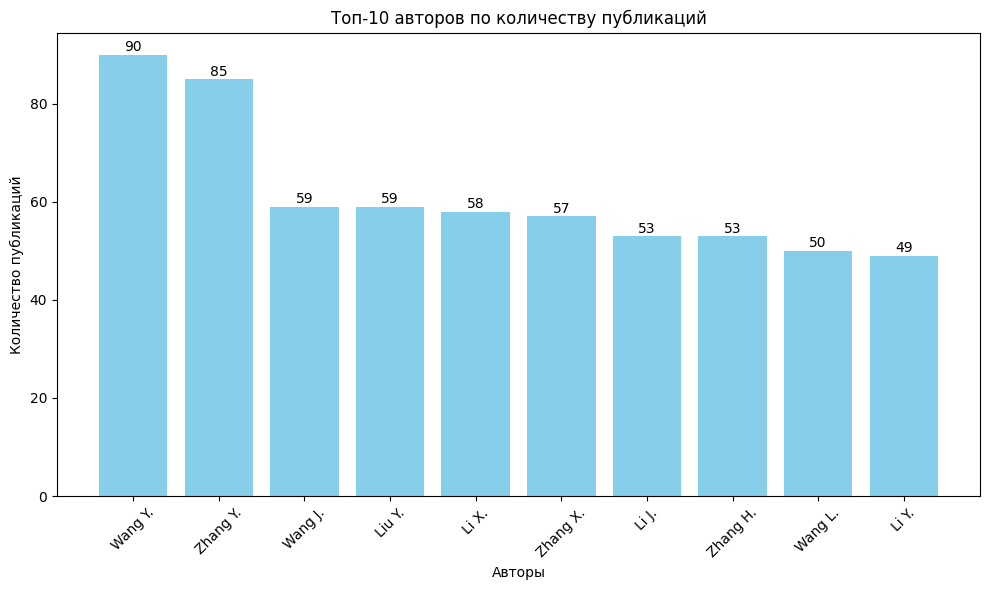

In [92]:
import matplotlib.pyplot as plt
import re
from collections import Counter

# Создаем пустой Counter для хранения частоты авторов
authors_counter = Counter()

# Проходим по каждой строке в столбце "Authors"
for authors in df["Authors"]:
    if isinstance(authors, str):  # Проверяем, что значение является строкой
        # Разделяем авторов по ";"
        authors_list = authors.split(";")
        for author in authors_list:
            author = author.strip()  # Убираем лишние пробелы
            authors_counter[author] += 1

# Получаем 15 самых частых авторов
top_15_authors = authors_counter.most_common(11)
top_15_authors = top_15_authors[1:]

# Выводим топ-15 авторов
print("Топ-15 авторов:")
for author, count in top_15_authors:
    print(f"Автор: {author}, Встречается: {count} раз(а)")

# Извлекаем имена авторов и их количество
authors, counts = zip(*top_15_authors)

# Построение графика (вертикальные столбцы)
plt.figure(figsize=(10, 6))
bars = plt.bar(authors, counts, color='skyblue')
plt.xlabel('Авторы')
plt.ylabel('Количество публикаций')
plt.title('Топ-10 авторов по количеству публикаций')
plt.xticks(rotation=45)  # Поворот меток на оси X для удобства
plt.tight_layout()  # Чтобы график не выходил за пределы

# Добавляем текст с количеством вхождений на каждом столбце
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             str(int(bar.get_height())), ha='center', va='bottom', fontsize=10)

# Показываем график
plt.show()

Топ-15 фраз:
Фраза: Positron emission, Встречается: 234 раз(а)
Фраза: Monte Carlo simulations, Встречается: 81 раз(а)
Фраза: Renormalization, Встречается: 55 раз(а)
Фраза: CP violation, Встречается: 39 раз(а)
Фраза: Supersymmetry, Встречается: 35 раз(а)
Фраза: Cherenkov radiation, Встречается: 31 раз(а)
Фраза: Weak interaction, Встречается: 24 раз(а)
Фраза: Lorentz invariance, Встречается: 20 раз(а)
Фраза: Perturbation theory, Встречается: 20 раз(а)
Фраза: Renormalization group, Встречается: 19 раз(а)
Фраза: Perturbative QCD, Встречается: 15 раз(а)
Фраза: Majorana fermions, Встречается: 13 раз(а)
Фраза: Luminosity, Встречается: 13 раз(а)
Фраза: Transverse momentum, Встречается: 9 раз(а)
Фраза: Instantons, Встречается: 9 раз(а)


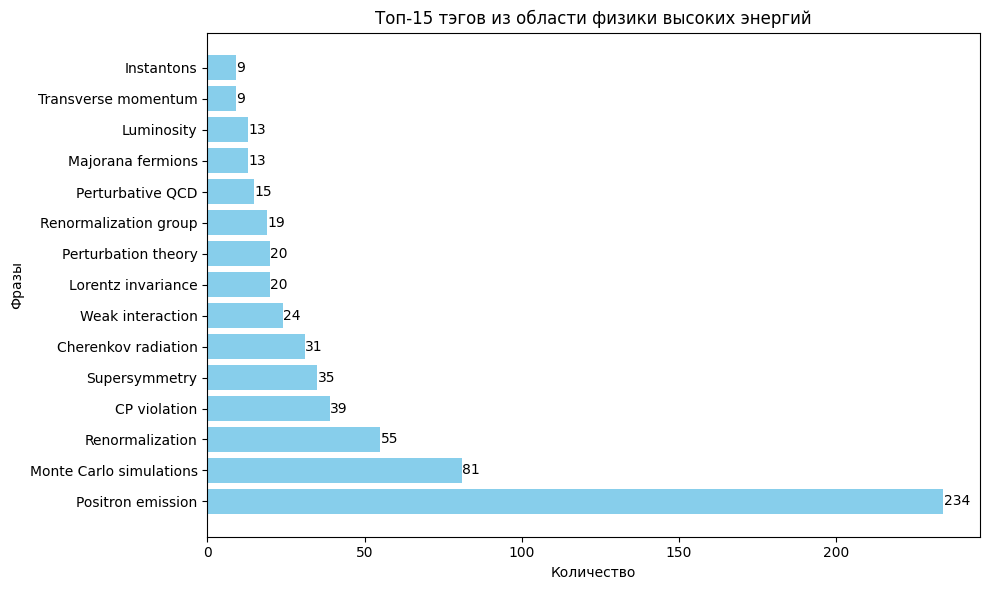

In [94]:
import matplotlib.pyplot as plt
import re
from collections import Counter

# Список фраз из high_energy_physics
high_energy_physics = [
    "Higgs mechanism", "Anomalous magnetic moment", "Vacuum state", "Beta decay", "Cherenkov radiation",
    "CPT symmetry", "Dilepton production", "Dijet events", "Gluon fusion", "Hadronization", "Jet quenching",
    "Lepton pair production", "Loop corrections", "Matrix elements", "Oscillation phenomena",
    "Parton distribution functions", "Positron emission", "Proton structure", "Quark-gluon plasma", "Regge theory",
    "Scalar mesons", "Sterile neutrinos", "Topological defects", "Transverse momentum", "Vertex corrections",
    "WIMP dark matter", "Z prime boson", "Photon-photon scattering", "Color confinement", "Flavor physics",
    "Precision measurements", "Monte Carlo simulations", "Beyond the Standard Model", "Composite Higgs",
    "Extra gauge bosons", "Flavor-changing neutral currents", "Muon colliders", "Proton-proton collisions",
    "Rare decays", "Strong CP problem", "Tau lepton", "Vector bosons", "Deep inelastic scattering", "Event generators",
    "Hadron physics", "Double beta decay", "Color charge", "Gauge symmetry", "Lorentz invariance", "Vacuum polarization",
    "Weak neutral currents", "Neutral kaons", "Meson spectroscopy", "Charm quark", "Strange quark",
    "Electron-positron annihilation", "Neutralino", "Gravitino", "Leptoquarks", "Axion-like particles", "Baryon asymmetry",
    "Heavy quark symmetry", "Inclusive cross sections", "Luminosity", "Scattering amplitudes", "Polarized beams",
    "Quantum anomalies", "Thermal field theory", "Wilson loops", "Fermion masses", "Gauge coupling unification",
    "Instantons", "Perturbative QCD", "Lagrangian formalism", "Supersymmetric particles", "Scalar fields",
    "Goldstone bosons", "Mass hierarchy problem", "Kaluza-Klein theory", "Lattice QCD", "Little Higgs models",
    "Spontaneous symmetry breaking", "Flavor symmetries", "Majorana fermions", "Light front quantization",
    "Time-reversal symmetry", "Neutrino mass hierarchy", "Astroparticle physics", "Vacuum fluctuations",
    "Effective field theory", "Renormalization group", "Grand unified theories", "BRST quantization", "Planck scale",
    "Lepton universality", "Pair production", "Schwinger effect", "Topological field theory", "Weak interaction",
    "Quark-hadron duality", "Flavor violation", "Seesaw mechanism", "Neutrino oscillations", "AdS/CFT correspondence",
    "Beam dump experiments", "Muon anomalous magnetic moment", "Polarization effects", "Multi-loop corrections",
    "SUSY breaking", "Gluon jets", "Hadronic final states", "Phase space integration", "Axion detection",
    "Noncommutative geometry", "Perturbation theory", "Muon g-2", "Baryogenesis", "Neutron electric dipole moment",
    "Rare event searches", "Extra dimensions", "Tensor interactions", "Dark photon", "No-scale supergravity",
    "High-luminosity LHC", "Trans-Planckian physics", "Dilaton", "Left-right symmetry", "Dynamical symmetry breaking",
    "Double-differential cross sections", "Spin-1/2 particles", "Wilson coefficients", "Vacuum decay", "Thermal QCD",
    "Charged current interactions", "Baryonic matter", "Particle decays", "Quantum chromodynamics", "LHC phenomenology",
    "High-energy collisions", "Supersymmetry", "Neutrino interactions", "Quark confinement", "Electroweak unification",
    "Top quark physics", "B-physics", "CP violation", "Chiral symmetry breaking", "Asymptotic freedom", "Renormalization"
]

# Создаем пустой Counter для хранения частоты фраз
high_energy_counter = Counter()

# Проходим по каждой строке в таблице
for col in df.columns:  # Пройдем по всем столбцам
    for row in df[col]:
        if isinstance(row, str):  # Проверяем, что значение является строкой
            for phrase in high_energy_physics:
                if re.search(r'\b' + re.escape(phrase) + r'\b', row):  # Ищем фразу в строке
                    high_energy_counter[phrase] += 1

# Получаем топ-15 самых часто встречающихся фраз
top_15_phrases = high_energy_counter.most_common(15)

# Выводим топ-15 фраз
print("Топ-15 фраз:")
for phrase, count in top_15_phrases:
    print(f"Фраза: {phrase}, Встречается: {count} раз(а)")

# Если нужно визуализировать данные

# Извлекаем фразы и их количество
phrases, counts = zip(*top_15_phrases)

# Построение графика
plt.figure(figsize=(10, 6))
bars = plt.barh(phrases, counts, color='skyblue')
plt.xlabel('Количество')
plt.ylabel('Фразы')
plt.title('Топ-15 тэгов из области физики высоких энергий')

# Добавляем текст с количеством вхождений на каждый столбец
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,  # Позиция текста
             str(int(bar.get_width())), va='center', fontsize=10)

plt.tight_layout()  # Чтобы график не выходил за пределы
plt.show()

In [81]:
import folium
from collections import defaultdict

# Словарь с университетами и их координатами (широта, долгота)
universities = {
    "Chinese Academy": {"location": [39.9042, 116.4074], "name": "Chinese Academy (Beijing, China)"},
    "University of Science and Technology of China": {"location": [31.8636, 117.2806], "name": "University of Science and Technology of China (Hefei, China)"},
    "Tsinghua University Center for Life Sciences": {"location": [39.9042, 116.4074], "name": "Tsinghua University Center for Life Sciences (Beijing, China)"},
    "Institute of Theoretical Physics": {"location": [39.9042, 116.4074], "name": "Institute of Theoretical Physics (Beijing, China)"},
    "Shanghai Jiao Tong University": {"location": [31.2304, 121.4737], "name": "Shanghai Jiao Tong University (Shanghai, China)"},
    "Tsinghua University": {"location": [39.9042, 116.4074], "name": "Tsinghua University (Beijing, China)"},
    "Nanjing University": {"location": [32.0603, 118.7969], "name": "Nanjing University (Nanjing, China)"},
    "Fudan University": {"location": [31.2304, 121.4737], "name": "Fudan University (Shanghai, China)"},
    "China University of Geosciences": {"location": [30.5852, 114.2986], "name": "China University of Geosciences (Wuhan, China)"},
    "Chinese Academy of Sciences": {"location": [39.9042, 116.4074], "name": "Chinese Academy of Sciences (Beijing, China)"}
}

# Группируем университеты по координатам
location_groups = defaultdict(list)

for university, data in universities.items():
    location_groups[tuple(data["location"])].append(data["name"])

# Создаем карту в центре Китая
m = folium.Map(location=[35.0, 105.0], zoom_start=5)

# Добавляем метки для каждого уникального местоположения
for location, universities_at_location in location_groups.items():
    lat, lon = location
    number_of_universities = len(universities_at_location)
    # Размер точки пропорционален количеству университетов
    folium.CircleMarker(
        location=[lat, lon],
        # Увеличиваем радиус точки пропорционально количеству
        radius=number_of_universities * 3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        popup=f"{number_of_universities} university(ies)\n" + "\n".join(
            universities_at_location)
    ).add_to(m)

# Сохраняем карту в HTML файл
m.save("universities_map_with_circles.html")

# Для отображения карты в Jupyter (если используете Jupyter Notebook)
# m

In [82]:
import folium
from collections import defaultdict

# Словарь с университетами и их координатами (широта, долгота)
universities = {
    "Chinese Academy": {"location": [39.9042, 116.4074], "name": "Chinese Academy (Beijing, China)"},
    "University of Science and Technology of China": {"location": [31.8636, 117.2806], "name": "University of Science and Technology of China (Hefei, China)"},
    "Tsinghua University Center for Life Sciences": {"location": [39.9042, 116.4074], "name": "Tsinghua University Center for Life Sciences (Beijing, China)"},
    "Institute of Theoretical Physics": {"location": [39.9042, 116.4074], "name": "Institute of Theoretical Physics (Beijing, China)"},
    "Shanghai Jiao Tong University": {"location": [31.2304, 121.4737], "name": "Shanghai Jiao Tong University (Shanghai, China)"},
    "Tsinghua University": {"location": [39.9042, 116.4074], "name": "Tsinghua University (Beijing, China)"},
    "Nanjing University": {"location": [32.0603, 118.7969], "name": "Nanjing University (Nanjing, China)"},
    "Fudan University": {"location": [31.2304, 121.4737], "name": "Fudan University (Shanghai, China)"},
    "China University of Geosciences": {"location": [30.5852, 114.2986], "name": "China University of Geosciences (Wuhan, China)"},
    "Chinese Academy of Sciences": {"location": [39.9042, 116.4074], "name": "Chinese Academy of Sciences (Beijing, China)"}
}

# Группируем университеты по координатам
location_groups = defaultdict(list)

for university, data in universities.items():
    location_groups[tuple(data["location"])].append(data["name"])

# Создаем карту в центре Китая
m = folium.Map(location=[35.0, 105.0], zoom_start=5)

# Добавляем метки для каждого уникального местоположения
for location, universities_at_location in location_groups.items():
    lat, lon = location
    number_of_universities = len(universities_at_location)
    # Размер точки пропорционален количеству университетов
    folium.CircleMarker(
        location=[lat, lon],
        # Увеличиваем радиус точки пропорционально количеству
        radius=number_of_universities * 3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        popup=f"{number_of_universities} university(ies)\n" + "\n".join(
            universities_at_location)
    ).add_to(m)

# Сохраняем карту в HTML файл
m.save("universities_map_with_circles.html")

# Для отображения карты в Jupyter (если используете Jupyter Notebook)
# m

In [84]:

from collections import defaultdict

# Создаем пустой словарь для хранения ключевых слов для каждого автора
author_keywords = defaultdict(list)

# Проходим по каждой строке в таблице
for i, row in df.iterrows():
    authors = row["Authors"]
    keywords = row["Author Keywords"]

    # Проверяем, что авторы и ключевые слова есть в строках
    if isinstance(authors, str) and isinstance(keywords, str):
        authors_list = authors.split(";")
        # Разделяем ключевые слова по запятой
        keywords_list = keywords.split(",")

        # Проходим по каждому автору в строке
        for author in authors_list:
            author = author.strip()  # Убираем лишние пробелы
            if author in dict(top_15_authors):  # Проверяем, входит ли автор в топ-15
                author_keywords[author].extend(keywords_list)

# Выводим для каждого автора его ключевые слова
for author, keywords in author_keywords.items():
    print(f"Автор: {author}")
    print("Ключевые слова:", set(keywords))  # Используем set(), чтобы удалить дубли
    print()


Автор: Zhang Y.
Ключевые слова: {'Data acquisition concepts; Data processing methods; Large detector systems for particle and astroparticle physics; Trigger concepts and systems (hardware and software)', 'Diffraction; Elastic scattering; Proton-proton collisions', 'integrin α<sub>3</sub>β<sub>1</sub>; molecular imaging; pancreatic cancer; positron emission computed tomography (PET)', 'Asialoglycoprotein receptor; Hepatic imaging; Liver targeting; N-acetylglucosamine; Positron emission tomography', '18F-fluorodeoxyglucose positron emission tomography/computed tomography (<sup>18</sup>F-FDG PET/CT); 18F-sodium fluoride positron emission tomography/computed tomography (<sup>18</sup>F-NaF PET/CT); ApoE<sup>−/−</sup> rat; Atherosclerosis; Hypoxia', 'Bone marrow aspirate; Bone marrow biopsy; Lymphoma', '2-deoxy-2-[18F]-fluoro-D-glucose (18F-FDG); half-dose; Hydration protocols; quantification; total-body positron emission tomography-computed tomography (total-body PET-CT)', 'diffuse large B-

In [85]:
from collections import Counter

# Создаем словарь для хранения частоты ключевых слов для каждого автора
author_keywords_counter = defaultdict(Counter)

# Проходим по каждой строке в таблице
for i, row in df.iterrows():
    authors = row["Authors"]
    keywords = row["Author Keywords"]

    # Проверяем, что авторы и ключевые слова есть в строках
    if isinstance(authors, str) and isinstance(keywords, str):
        authors_list = authors.split(";")
        # Разделяем ключевые слова по запятой
        keywords_list = keywords.split(",")

        # Проходим по каждому автору в строке
        for author in authors_list:
            author = author.strip()  # Убираем лишние пробелы
            if author in dict(top_15_authors):  # Проверяем, входит ли автор в топ-15
                author_keywords_counter[author].update(keywords_list)

# Создаем словарь, чтобы хранить только топ-5 ключевых слов для каждого автора
author_top_keywords = {}

# Для каждого автора сортируем ключевые слова по частоте и оставляем топ-5
for author, keywords_counter in author_keywords_counter.items():
    # Получаем топ-5 самых популярных ключевых слов
    top_keywords = keywords_counter.most_common(5)
    author_top_keywords[author] = top_keywords

# Выводим топ-5 ключевых слов для каждого автора
for author, top_keywords in author_top_keywords.items():
    print(f"Автор: {author}")
    for keyword, count in top_keywords:
        print(f"  Ключевое слово: {keyword}, Встречается: {count} раз(а)")
    print()

Автор: Zhang Y.
  Ключевое слово: Differential and Algebraic Geometry; Scattering Amplitudes, Встречается: 4 раз(а)
  Ключевое слово: 2D materials; Cherenkov radiation; infrared nanoscopy; phonon polaritons, Встречается: 2 раз(а)
  Ключевое слово: Magnetic resonance imaging; Positron emission tomography/computed tomography; Spinal neoplasms, Встречается: 2 раз(а)
  Ключевое слово: Scattering Amplitudes; String Field Theory, Встречается: 1 раз(а)
  Ключевое слово: integrin α<sub>3</sub>β<sub>1</sub>; molecular imaging; pancreatic cancer; positron emission computed tomography (PET), Встречается: 1 раз(а)

Автор: Wang L.
  Ключевое слово: Alkali Metal Cations; BPC6; IGM Analysis; NMR; Solvent Effects; Weak Interaction, Встречается: 2 раз(а)
  Ключевое слово: 2D materials; Cherenkov radiation; infrared nanoscopy; phonon polaritons, Встречается: 1 раз(а)
  Ключевое слово: Disturbance Observer; Flexible manipulators; Linear Quadratic Regulator; Singular Perturbation Theory; Sliding-mode Cont

In [ ]:
import folium
from collections import defaultdict

# Словарь с университетами и их координатами (широта, долгота)
universities = {
    "Chinese Academy": {"location": [39.9042, 116.4074], "name": "Chinese Academy (Beijing, China)"},
    "University of Science and Technology of China": {"location": [31.8636, 117.2806], "name": "University of Science and Technology of China (Hefei, China)"},
    "Tsinghua University Center for Life Sciences": {"location": [39.9042, 116.4074], "name": "Tsinghua University Center for Life Sciences (Beijing, China)"},
    "Institute of Theoretical Physics": {"location": [39.9042, 116.4074], "name": "Institute of Theoretical Physics (Beijing, China)"},
    "Shanghai Jiao Tong University": {"location": [31.2304, 121.4737], "name": "Shanghai Jiao Tong University (Shanghai, China)"},
    "Tsinghua University": {"location": [39.9042, 116.4074], "name": "Tsinghua University (Beijing, China)"},
    "Nanjing University": {"location": [32.0603, 118.7969], "name": "Nanjing University (Nanjing, China)"},
    "Fudan University": {"location": [31.2304, 121.4737], "name": "Fudan University (Shanghai, China)"},
    "China University of Geosciences": {"location": [30.5852, 114.2986], "name": "China University of Geosciences (Wuhan, China)"},
    "Chinese Academy of Sciences": {"location": [39.9042, 116.4074], "name": "Chinese Academy of Sciences (Beijing, China)"}
}

# Группируем университеты по координатам
location_groups = defaultdict(list)

for university, data in universities.items():
    location_groups[tuple(data["location"])].append(data["name"])

# Создаем карту в центре Китая
m = folium.Map(location=[35.0, 105.0], zoom_start=5)

# Добавляем метки для каждого уникального местоположения
for location, universities_at_location in location_groups.items():
    lat, lon = location
    number_of_universities = len(universities_at_location)
    # Размер точки пропорционален количеству университетов
    folium.CircleMarker(
        location=[lat, lon],
        # Увеличиваем радиус точки пропорционально количеству
        radius=number_of_universities * 3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        popup=f"{number_of_universities} university(ies)\n" + "\n".join(
            universities_at_location)
    ).add_to(m)

# Сохраняем карту в HTML файл
m.save("universities_map_with_circles.html")

# Для отображения карты в Jupyter (если используете Jupyter Notebook)
# m

In [90]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

# Список интересующих индексов и их названия
indices = {
    "100049": "Chinese Academy",
    "230026": "University of Science and Technology of China",
    "100871": "Tsinghua University Center for Life Sciences",
    "100190": "Institute of Theoretical Physics",
    "200240": "Shanghai Jiao Tong University",
    "100084": "Tsinghua University",
    "210093": "Nanjing University",
    "200032": "Fudan University",
    "430074": "China University of Geosciences",
    "730000": "Chinese Academy of Sciences"
}

# Создаем словарь для хранения статистики по годам для каждого университета
university_year_counter = defaultdict(lambda: defaultdict(int))

# Проходим по каждой строке в таблице
for i, row in df.iterrows():
    affiliations = row["Affiliations"]
    year = row["Year"]

    # Проверяем, что данные присутствуют
    if isinstance(affiliations, str) and isinstance(year, (int, str)):
        # Ищем индексы в строке "Affiliations"
        for index, university in indices.items():
            if index in affiliations:
                # Увеличиваем счетчик для этого университета и года
                university_year_counter[university][year] += 1

# Преобразуем данные в таблицу DataFrame для удобного отображения
university_year_stats = pd.DataFrame(
    university_year_counter).fillna(0).astype(int)

# Применяем цветовое форматирование


def color_map(val):
    # Определяем минимальное и максимальное значение для масштабирования цвета
    min_val = university_year_stats.min().min()
    max_val = university_year_stats.max().max()

    # Применяем градиент от синего (холодный) к красному (тёплый)
    norm = plt.Normalize(vmin=min_val, vmax=max_val)
    cmap = plt.cm.coolwarm
    color = cmap(norm(val))

    # Возвращаем стиль с фоновым цветом и черным текстом
    return f'background-color: rgb({int(color[0] * 255)}, {int(color[1] * 255)}, {int(color[2] * 255)}); color: black'


# Применяем форматирование к таблице
styled_table = university_year_stats.style.applymap(color_map)

# Показываем стилизованную таблицу
styled_table

/var/folders/8j/nlrr72rj58x8_6zv2nyz95m00000gn/T/ipykernel_68042/4092547134.py:57: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table = university_year_stats.style.applymap(color_map)


,Shanghai Jiao Tong University,Nanjing University,Tsinghua University,Chinese Academy,Tsinghua University Center for Life Sciences,Institute of Theoretical Physics,Chinese Academy of Sciences,China University of Geosciences,University of Science and Technology of China,Fudan University
2020,17,9,19,34,15,23,13,8,18,8
2021,12,6,7,37,14,16,6,8,17,7
2022,5,8,9,21,12,9,4,2,10,4
2023,7,7,9,13,8,9,5,7,11,0
2024,6,3,2,8,3,3,0,2,4,2
